In [2]:
from google.colab import files
uploaded = files.upload()

Saving Train_data.xlsx - Final.csv to Train_data.xlsx - Final (1).csv


In [3]:
import pandas as pd
import io
import warnings
import numpy as np
warnings.filterwarnings('ignore')

df = pd.read_csv(io.BytesIO(uploaded['Train_data.xlsx - Final.csv']))
df1 = df.copy()
df.head()

,Warehouse id,Region,SKU id,Apr-18,May-18,Jun-18,Jul-18,Aug-18,Sep-18,Oct-18,...,Aug-20,Sep-20,Oct-20,Nov-20,Dec-20,Jan-21,Feb-21,Mar-21,Apr-21,May-21
0,Wh-1,NORTH,SKU-1,27,13,30,14,22,8,8,...,12,8,8,8,8,8,14,16,8,12
1,Wh-1,NORTH,SKU-2,88,28,127,130,58,10,7,...,16,7,7,7,7,7,13,43,13,43
2,Wh-1,NORTH,SKU-3,6,6,6,6,6,6,6,...,8,6,6,6,6,6,6,8,26,6
3,Wh-1,NORTH,SKU-4,162,184,110,172,90,40,18,...,82,78,38,18,22,28,36,352,58,18
4,Wh-1,NORTH,SKU-5,171,402,627,615,300,417,141,...,468,216,75,6,30,66,141,699,183,24


In [4]:
df['SKU id']=pd.Series([int(id[4:]) for id in df["SKU id"].values])
df['Warehouse id']=pd.Series([int(id[3:]) for id in df["Warehouse id"].values])
df

,Warehouse id,Region,SKU id,Apr-18,May-18,Jun-18,Jul-18,Aug-18,Sep-18,Oct-18,...,Aug-20,Sep-20,Oct-20,Nov-20,Dec-20,Jan-21,Feb-21,Mar-21,Apr-21,May-21
0,1,NORTH,1,27,13,30,14,22,8,8,...,12,8,8,8,8,8,14,16,8,12
1,1,NORTH,2,88,28,127,130,58,10,7,...,16,7,7,7,7,7,13,43,13,43
2,1,NORTH,3,6,6,6,6,6,6,6,...,8,6,6,6,6,6,6,8,26,6
3,1,NORTH,4,162,184,110,172,90,40,18,...,82,78,38,18,22,28,36,352,58,18
4,1,NORTH,5,171,402,627,615,300,417,141,...,468,216,75,6,30,66,141,699,183,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,4,SOUTH,229,7,7,7,7,7,7,7,...,591,167,455,215,135,239,295,7,7,135
1035,4,SOUTH,230,49,25,41,13,21,53,33,...,9,9,21,133,9,33,9,103,49,9
1036,4,SOUTH,231,21,13,13,21,29,21,21,...,13,13,13,13,13,21,13,13,13,13
1037,4,SOUTH,232,15,13,13,11,9,11,36,...,9,9,17,13,11,36,21,17,9,9


In [5]:
max = df['SKU id'].max()
freq = np.zeros((max+1,4))
wh_ids = list(set(df['Warehouse id']))

In [6]:
for i in range(len(df)):
  freq[df['SKU id'].loc[i]][df['Warehouse id'].loc[i]-1]=1

In [7]:
freq=pd.DataFrame(data=freq,columns=wh_ids)
avail=freq.sum(axis=1)
avail_1=[j for j in avail.index if avail.loc[j]==1]
avail_2=[j for j in avail.index if avail.loc[j]==2]
avail_3=[j for j in avail.index if avail.loc[j]==3]
avail_4=[j for j in avail.index if avail.loc[j]==4]
total_eval = [avail_1, avail_2, avail_3, avail_4]

In [8]:
wh = df1.groupby('Warehouse id')
wh_data1 = wh.get_group('Wh-1')
wh_data2 = wh.get_group('Wh-2')
wh_data3 = wh.get_group('Wh-3')
wh_data4 = wh.get_group('Wh-4')

In [9]:
#Finding total monthly sales of all products for each warehouse
wh1_sum = pd.DataFrame({'Month':wh_data1.columns[3:],'Total':wh_data1.sum(axis=0,numeric_only=True)})
wh2_sum = pd.DataFrame({'Month':wh_data2.columns[3:],'Total':wh_data2.sum(axis=0,numeric_only=True)})
wh3_sum = pd.DataFrame({'Month':wh_data3.columns[3:],'Total':wh_data3.sum(axis=0,numeric_only=True)})
wh4_sum = pd.DataFrame({'Month':wh_data4.columns[3:],'Total':wh_data4.sum(axis=0,numeric_only=True)})
series = wh_data1.sum(axis=0,numeric_only=True) + wh_data2.sum(axis=0,numeric_only=True) + wh_data3.sum(axis=0,numeric_only=True) + wh_data4.sum(axis=0,numeric_only=True)
wh_final_sum = pd.DataFrame({'Month':wh_data1.columns[3:],'Total':series})
wh_final_sum

,Month,Total
Apr-18,Apr-18,257779
May-18,May-18,225281
Jun-18,Jun-18,217311
Jul-18,Jul-18,163865
Aug-18,Aug-18,181704
Sep-18,Sep-18,164707
Oct-18,Oct-18,168027
Nov-18,Nov-18,209654
Dec-18,Dec-18,220302
Jan-19,Jan-19,184117


<Figure size 2160x720 with 0 Axes>

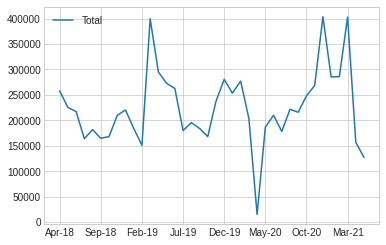

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(30,10))
plt.style.use('seaborn-whitegrid')
wh_final_sum.plot()

#plt.figure(figsize=(30,10))
#plt.style.use('seaborn-whitegrid')
#wh2_sum.plot()

#plt.figure(figsize=(30,10))
#plt.style.use('seaborn-whitegrid')
#wh3_sum.plot()

#plt.figure(figsize=(30,10))
#plt.style.use('seaborn-whitegrid')
#wh4_sum.plot()

In [11]:
wh_sku = df1.groupby('SKU id')
sku_ids = [id for id,_ in wh_sku]
for i in range(4):
  avail_i=total_eval[i]
  for id in avail_i:
    wh_sku_id = wh_sku.get_group('SKU-'+str(id))
    wh_id_sales = wh_sku_id.sum(axis=0,numeric_only=True)

In [86]:
#AUTOREGRESSOR
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_percentage_error
import sys
min_mape_list, min_coefficients_list, pred_exp_list  = [], [], []

for i in range(len(wh_data1)):

 min_mape = sys.float_info.max
 pred_exp = ()
 min_coefficients = []
 for lag in range(1,18):
		x=wh_data1.iloc[i,3:].values
		train,test = x[:len(x)-1],x[len(x)-1:]
		model = AutoReg(train, lags=lag)
		model_fit = model.fit()
		predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
		mape = mean_absolute_percentage_error(test, predictions)
		if mape < min_mape:
			min_mape = mape
			min_coefficients = model_fit.params
			pred_exp = predictions[0],test[0]

 min_mape_list.append(min_mape)
 min_coefficients_list.append(min_coefficients)
 pred_exp_list.append(pred_exp)

print(len([i for i in range(len(min_mape_list)) if min_mape_list[i]>5]))
for i in range(len(pred_exp_list)):
	if min_mape_list[i]>5:
		print('Min. MAPE :',min_mape_list[i])
		print('Predictions, Expectations :',pred_exp_list[i])

19
Min. MAPE : 9.929151111863533
Predictions, Expectations : (262.2996266847248, 24)
Min. MAPE : 66.36749810104617
Predictions, Expectations : (673.6749810104617, 10)
Min. MAPE : 11.516127487996734
Predictions, Expectations : (112.64514739197061, 9)
Min. MAPE : 5.440639306521828
Predictions, Expectations : (70.84703237174011, 11)
Min. MAPE : 21.65183455611779
Predictions, Expectations : (724.8587057957693, 32)
Min. MAPE : 54.854310784223195
Predictions, Expectations : (167.56293235266958, 3)
Min. MAPE : 29.165713098382998
Predictions, Expectations : (271.491417885447, 9)
Min. MAPE : 8.13170897630703
Predictions, Expectations : (748.8001360571765, 82)
Min. MAPE : 9.678710575903638
Predictions, Expectations : (395.11229130843464, 37)
Min. MAPE : 5.1476759541544475
Predictions, Expectations : (55.32908358739003, 9)
Min. MAPE : 10.76466495094359
Predictions, Expectations : (58.82332475471795, 5)
Min. MAPE : 41.207678588075076
Predictions, Expectations : (126.62303576422522, 3)
Min. MAPE : 

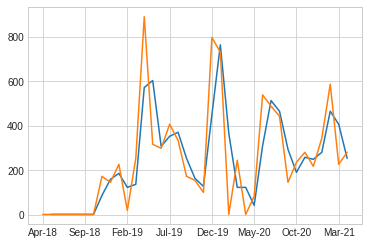

In [91]:
wh_data1_ = wh_data1.iloc[:,3:-1]
wh_data1_ = wh_data1_.T
# wh_data1_
wh_data1_[13].rolling(window=2).mean().plot()
wh_data1_[13].plot()

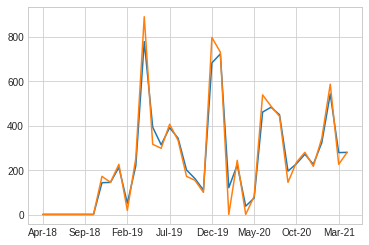

In [93]:

# wh_data1_
wh_data1_[13].ewm(com=0.2).mean().plot()
wh_data1_[13].plot()